<a href="https://colab.research.google.com/github/jainam-shah1/R-projects/blob/main/Cost_of_living_in_SF_City" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report on cost of living in San Francisco
##By Jainam Bhaveshkumar Shah

##Objective
<br>Using the dataset below I aim to analyse the insights regarding the income in San Francisco city.</br>
<br>This dataset is obtained from the San francisco controller's office and it contains salary and benefits paid to City employees from 2013 to 2020.</br>
<br>By using this dataset we will be able to depict the cost of living in this modernized city.</br>

##Data exploration

- Import and read the dataset.
- Then print the top 6 columns of the dataset

In [ ]:
df <- read.csv("/content/employee-compensation.csv",row.names = NULL, 
                 stringsAsFactors = FALSE)
head(df)

,Organization.Group.Code,Job.Family.Code,Job.Code,Year.Type,Year,Organization.Group,Department.Code,Department,Union.Code,Union,⋯,Employee.Identifier,Salaries,Overtime,Other.Salaries,Total.Salary,Retirement,Health.and.Dental,Other.Benefits,Total.Benefits,Total.Compensation
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,37730,57534.65,0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
2,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,26574,57678.50,0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
3,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,8148,63532.93,0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
4,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,27436,101274.51,0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
5,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,37730,5084.00,0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
6,1,1000,1064,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,36223,34456.00,0,0.00,34456.00,7346.00,3827.63,2579.95,13753.58,48209.58


- It states that this dataset has 683277 rows and 22 columns

In [ ]:
dim(df)

[1] 683277     22

- This prints the summary of each column such as: min, max, quaterile range, mean, median, length and also NA values

In [ ]:
summary(df)

 Organization.Group.Code Job.Family.Code      Job.Code        
 Min.   :1.000           Length:683277      Length:683277     
 1st Qu.:2.000           Class :character   Class :character  
 Median :2.000           Mode  :character   Mode  :character  
 Mean   :2.978                                                
 3rd Qu.:4.000                                                
 Max.   :7.000                                                
                                                              
  Year.Type              Year      Organization.Group Department.Code   
 Length:683277      Min.   :2013   Length:683277      Length:683277     
 Class :character   1st Qu.:2015   Class :character   Class :character  
 Mode  :character   Median :2017   Mode  :character   Mode  :character  
                    Mean   :2016                                        
                    3rd Qu.:2018                                        
                    Max.   :2020                          

- Total number of NA values in the dataset

In [ ]:
sum(is.na(df))

[1] 351

- Total number of NA values in each column.

In [ ]:
sapply(df, function(x) 
            sum(is.na(x)))

Organization.Group.Code         Job.Family.Code                Job.Code 
                      0                       0                       0 
              Year.Type                    Year      Organization.Group 
                      0                       0                       0 
        Department.Code              Department              Union.Code 
                      0                       0                     351 
                  Union              Job.Family                     Job 
                      0                       0                       0 
    Employee.Identifier                Salaries                Overtime 
                      0                       0                       0 
         Other.Salaries            Total.Salary              Retirement 
                      0                       0                       0 
      Health.and.Dental          Other.Benefits          Total.Benefits 
                      0                       0                       0 
     Total.Compensation 
                      0

- Delete column union code which contains 351 null values

In [ ]:
df = subset(df, select = -c(Union.Code) )


- Print out column names

In [ ]:
colnames(df)

[1] "Organization.Group.Code" "Job.Family.Code"        
 [3] "Job.Code"                "Year.Type"              
 [5] "Year"                    "Organization.Group"     
 [7] "Department.Code"         "Department"             
 [9] "Union"                   "Job.Family"             
[11] "Job"                     "Employee.Identifier"    
[13] "Salaries"                "Overtime"               
[15] "Other.Salaries"          "Total.Salary"           
[17] "Retirement"              "Health.and.Dental"      
[19] "Other.Benefits"          "Total.Benefits"         
[21] "Total.Compensation"

- After deleting the union code column from the data set there are no more NA values.

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
#install necessary libraries
install.packages('ggplot2')
install.packages('GGally')

#load libraries
library(ggplot2)
library(GGally)
library("dplyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



##Subsets of data

In [ ]:
head(df[c(5,8,11:12,13:21)],10)

,Year,Department,Job,Employee.Identifier,Salaries,Overtime,Other.Salaries,Total.Salary,Retirement,Health.and.Dental,Other.Benefits,Total.Benefits,Total.Compensation
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,ADP Adult Probation,IS Administrator 1,37730,57534.65,0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
2,2013,ADP Adult Probation,IS Administrator 3,26574,57678.50,0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
3,2013,ADP Adult Probation,IS Trainer-Assistant,8148,63532.93,0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
4,2013,ADP Adult Probation,IS Business Analyst-Principal,27436,101274.51,0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
5,2013,ADP Adult Probation,IS Programmer Analyst,37730,5084.00,0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
6,2013,ADP Adult Probation,IS Prg Analyst-Principal,36223,34456.00,0,0.00,34456.00,7346.00,3827.63,2579.95,13753.58,48209.58
7,2013,ADP Adult Probation,IS Project Director,51426,139889.00,0,0.00,139889.00,26799.23,12918.24,9791.54,49509.01,189398.01
8,2013,ADP Adult Probation,IT Operations Support Admin IV,26574,46572.00,0,0.00,46572.00,9929.16,5741.44,3822.28,19492.88,66064.88
9,2013,ADP Adult Probation,Training Officer,37983,84681.53,0,0.00,84681.53,16661.84,12918.24,6838.44,36418.52,121100.05


-- made subsets of columns by grouping them.

- This code print the total salary, retirement income and total benefits of each year with year 2017 having the highest total salaries as well as total benefits.

In [ ]:
grp_year <- df %>% group_by(Year) %>%
                    summarise(total_salaries = sum(Salaries),
                                total_retirement_income = sum(Retirement),
                                total_benefits = sum(Total.Benefits),
                                total_compensation = sum(Total.Compensation),
                              .groups = 'drop')
 
#View(grp_year)
head(grp_year[order(grp_year $ total_salaries, decreasing = TRUE),],8)

Year,total_salaries,total_retirement_income,total_benefits,total_compensation
<int>,<dbl>,<dbl>,<dbl>,<dbl>
2017,9252930812,1696789927,3712084303,14149265730
2019,6787841128,1331189668,2793324138,10522127756
2018,6515750650,1245652936,2654059198,10016514486
2016,5812009475,1082868131,2347435092,8922178817
2015,5412272803,1167589218,2314141563,8418018017
2014,5109369001,1103888583,2211137892,7989456545
2013,5064585032,967740952,2051922816,7769136365
2020,3509946564,737092987,1488035893,5471228049


- ^ From the above output it can be noticed that year 2017 received highest salaries, retirement income as well as benefits.


- From the below ouput it can be denoted that **Registered Nurse** has the highest total salaries but **Transit Operator** has more total retirement income as well as total benefits in 2017.

In [ ]:
grp_job <- df %>% group_by(Job,Year) %>%
                    summarise(
                                total_salaries = sum(Salaries),
                                total_retirement_income = sum(Retirement),
                                total_benefits = sum(Total.Benefits),
                              .groups = 'drop')
 
 #arrange(grp_job, sum_of_total_salaries)  

head(grp_job[order(grp_job $ total_salaries, decreasing = TRUE),],10)
tail(grp_job[order(grp_job $ total_salaries, decreasing = TRUE),],10)


Job,Year,total_salaries,total_retirement_income,total_benefits
<chr>,<int>,<dbl>,<dbl>,<dbl>
Registered Nurse,2017,465790236,83324582,171744909
Transit Operator,2017,456582929,94554432,238619992
Registered Nurse,2019,355110670,65118206,135384780
Registered Nurse,2018,333808714,60072510,126675463
Transit Operator,2019,319133962,67195460,168335152
Transit Operator,2018,315340165,64225762,163558995
Registered Nurse,2016,294034760,57120534,107154923
Transit Operator,2016,283264105,67947654,156902766
Registered Nurse,2015,273878746,57279528,100576326


Job,Year,total_salaries,total_retirement_income,total_benefits
<chr>,<int>,<dbl>,<dbl>,<dbl>
Special Assistant 16,2014,0,0.00,134.98
Special Assistant 21,2016,0,0.00,1349.08
Sr Medical Transcriber Typist,2016,0,0.00,22.44
Steamfitter Supervisor 2,2019,0,0.00,4226.36
Transit Paint Shop Sprv1,2014,0,0.00,490.22
Transit Paint Shop Sprv1,2015,0,0.00,73.53
Transit Paint Shop Sprv1,2016,0,0.00,73.53
Trnst Power Line Wrk Sprv 2,2016,0,0.00,1750.92
Victim & Witness Technician,2015,0,0.00,647.79


- This codes output states that Job family "Street Transit" received highest total benefits in the year 2017 with 334M while Administrative Secretarial	revceived the lowest in 2020 with only 0.1M

In [ ]:
grp_job.family <- df %>% group_by(Job.Family,Year) %>%
                    summarise(
                                total_salaries = sum(Salaries),
                                total_retirement_income = sum(Retirement),
                                total_benefits = sum(Total.Benefits),
                              .groups = 'drop')
 


head(grp_job.family[order(grp_job.family $ total_salaries, decreasing = TRUE),],10)
tail(grp_job.family[order(grp_job.family $ total_salaries, decreasing = TRUE),],10)



Job.Family,Year,total_salaries,total_retirement_income,total_benefits
<chr>,<int>,<dbl>,<dbl>,<dbl>
Nursing,2017,986163884,152129110,332523877
Police Services,2017,817624241,144328008,260339021
Nursing,2019,720383607,119858990,252092698
Nursing,2018,697232991,112336763,240024279
Street Transit,2017,675523164,135990355,334371906
Journeyman Trade,2017,616265165,115275192,267351374
Nursing,2016,613267394,97349480,208714818
Police Services,2019,584023751,109957500,194143164
Nursing,2015,573501471,108076378,208681145


Job.Family,Year,total_salaries,total_retirement_income,total_benefits
<chr>,<int>,<dbl>,<dbl>,<dbl>
Administrative Secretarial,2017,1530412.2,261100.51,582157.9
Administrative Secretarial,2014,1397044.2,280196.71,579854.0
Administrative Secretarial,2015,1388449.4,276512.69,561269.1
SF Redevelopment Agency,2017,1363497.9,258100.38,614334.0
Administrative Secretarial,2016,1349652.7,231764.90,513007.5
Administrative & Mgmt (Unrep),2013,1301706.9,242756.97,387377.3
Emergency Services,2013,1102510.2,211044.36,455851.0
Administrative Secretarial,2019,965660.6,188546.08,399680.0
Administrative Secretarial,2018,947552.7,181455.17,387014.6


##Single Vector

In [ ]:
grp_job <- df %>% group_by(Job) %>%
                    summarise(
                                sum_of_total_salaries = sum(Total.Salary),
                                total_retirement_income = sum(Retirement),
                                total_benefits = sum(Total.Benefits),
                              .groups = 'drop')
 
 #arrange(grp_job, sum_of_total_salaries)  

head(grp_job[order(grp_job $ sum_of_total_salaries, decreasing = TRUE),],10)

Job,sum_of_total_salaries,total_retirement_income,total_benefits
<chr>,<dbl>,<dbl>,<dbl>
Transit Operator,2893394656,545003305,1258055425
Registered Nurse,2753545597,471262726,908633872
Firefighter,1906665860,290925484,531110226
Police Officer 3,1788071681,261673953,447241536
Sergeant 3,1160303356,171466167,281317215
Deputy Sheriff,1157934522,242485781,375643851
Special Nurse,1014506714,46284244,144142816
Attorney (Civil/Criminal),950439191,180090318,320104799
Police Officer 2,930357770,140751077,245139235


- Transit Operator has the highest occurance in the dataset which means that most of the people in San Francisco are occupied being Transit Operator also because it offers more benefits all together

In [ ]:
require(dplyr)
head(df %>% count(Job, name = "count", sort = TRUE),10)
tail(df %>% count(Job, name = "count", sort = TRUE),10)


,Job,count
,<chr>,<int>
1,Transit Operator,43373
2,Special Nurse,25285
3,Registered Nurse,21954
4,Firefighter,14038
5,Public Service Trainee,13690
6,Custodian,13525
7,Police Officer 3,13121
8,Recreation Leader,11577
9,Public Svc Aide-Public Works,10956


,Job,count
,<chr>,<int>
1341,Exec Asst to Airport Director,1
1342,Mayoral Staff I,1
1343,Mobile Equipment Supervisor,1
1344,Musm Exhibit Packer & Repairer,1
1345,Pianist,1
1346,Police Services Aide,1
1347,Special Assistant 8,1
1348,Sr Sprvg Institut Mgr (PERS),1
1349,Trial Delay Reduct Coord,1


In [ ]:
job <- c(grp_job["Job"])
total_salary <- c(grp_job["sum_of_total_salaries"])
total_retirement_income <- c(grp_job["total_retirement_income"])
total_benefits <- c(grp_job["total_benefits"])

class(job)
class(total_salary)
class(total_retirement_income)
class(total_benefits)

[1] "list"

[1] "list"

[1] "list"

[1] "list"

In [ ]:
job <- as.numeric(unlist(job))
total_salary <- as.numeric(unlist(total_salary))
total_retirement_income <- as.numeric(unlist(total_retirement_income))
total_benefits <- as.numeric(unlist(total_benefits))

class(job)
class(total_salary)
class(total_retirement_income)
class(total_benefits)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

In [ ]:
job_title_vector <- grp_job[2:6,2:4]
job_title_vector

sum_of_total_salaries,total_retirement_income,total_benefits
<dbl>,<dbl>,<dbl>
54850361.3,10904337.02,28098538.5
1629228.8,289231.52,723598.9
71892182.4,13894290.81,31835313.7
518111.9,95455.43,213571.4
168908126.4,31825619.62,68177146.5


In [ ]:
sum_of_total_salaries <- c(job_title_vector["sum_of_total_salaries"])
total_retirement_income <- c(job_title_vector["total_retirement_income"])
total_benefits <- c(job_title_vector["total_benefits"])


class(sum_of_total_salaries)
class(total_retirement_income)
class(total_benefits)

[1] "list"

[1] "list"

[1] "list"

In [ ]:
sum_of_total_salaries <- as.numeric(unlist(sum_of_total_salaries))
total_retirement_income <- as.numeric(unlist(total_retirement_income))
total_benefits <- as.numeric(unlist(total_benefits))


class(sum_of_total_salaries)
class(total_retirement_income)
class(total_benefits)

[1] "numeric"

[1] "numeric"

[1] "numeric"

In [ ]:
job_title_vector
summary(job_title_vector)

sum_of_total_salaries,total_retirement_income,total_benefits
<dbl>,<dbl>,<dbl>
54850361.3,10904337.02,28098538.5
1629228.8,289231.52,723598.9
71892182.4,13894290.81,31835313.7
518111.9,95455.43,213571.4
168908126.4,31825619.62,68177146.5


 sum_of_total_salaries total_retirement_income total_benefits    
 Min.   :   518112     Min.   :   95455        Min.   :  213571  
 1st Qu.:  1629229     1st Qu.:  289232        1st Qu.:  723599  
 Median : 54850361     Median :10904337        Median :28098538  
 Mean   : 59559602     Mean   :11401787        Mean   :25809634  
 3rd Qu.: 71892182     3rd Qu.:13894291        3rd Qu.:31835314  
 Max.   :168908126     Max.   :31825620        Max.   :68177147  

##Creating Lists

- I have created 5 different list from the grouped **Year** column from grp_year data frame

In [ ]:
chunk_number <- 5         # Define number of chunks

split(grp_year$Year,             # Applying split() function
      cut(seq_along(grp_year$Year),
          chunk_number,
          labels = FALSE))

$`1`
[1] 2013 2014

$`2`
[1] 2015

$`3`
[1] 2016 2017

$`4`
[1] 2018

$`5`
[1] 2019 2020

##Conditionals

In [ ]:
summary(grp_year)

      Year      sum_of_total_salaries total_retirement_income
 Min.   :2013   Min.   :3.983e+09     Min.   :7.371e+08      
 1st Qu.:2015   1st Qu.:5.763e+09     1st Qu.:1.054e+09      
 Median :2016   Median :6.339e+09     Median :1.136e+09      
 Mean   :2016   Mean   :6.711e+09     Mean   :1.167e+09      
 3rd Qu.:2018   3rd Qu.:7.454e+09     3rd Qu.:1.267e+09      
 Max.   :2020   Max.   :1.044e+10     Max.   :1.697e+09      
 total_benefits     
 Min.   :1.488e+09  
 1st Qu.:2.171e+09  
 Median :2.331e+09  
 Mean   :2.447e+09  
 3rd Qu.:2.689e+09  
 Max.   :3.712e+09  

- constructed an if else condition to check if the total salary is above median or below and concatenated the column to grp_year before printing.

In [ ]:
mutate(grp_year, Result = ifelse(sum_of_total_salaries >= 6339000000, "Above median", "Below median"))


Year,sum_of_total_salaries,total_retirement_income,total_benefits,Result
<int>,<dbl>,<dbl>,<dbl>,<chr>
2013,5717213549,967740952,2051922816,Below median
2014,5778318653,1103888583,2211137892,Below median
2015,6103876453,1167589218,2314141563,Below median
2016,6574743725,1082868131,2347435092,Above median
2017,10437181428,1696789927,3712084303,Above median
2018,7362455288,1245652936,2654059198,Above median
2019,7728803618,1331189668,2793324138,Above median
2020,3983192157,737092987,1488035893,Below median


In [ ]:
mutate(grp_year, Result = ifelse(total_retirement_income <= 1033900000, "Very little total retirement income", "more than minimum total retirement income"))


Year,sum_of_total_salaries,total_retirement_income,total_benefits,Result
<int>,<dbl>,<dbl>,<dbl>,<chr>
2013,5717213549,967740952,2051922816,Very little total retirement income
2014,5778318653,1103888583,2211137892,more than minimum total retirement income
2015,6103876453,1167589218,2314141563,more than minimum total retirement income
2016,6574743725,1082868131,2347435092,more than minimum total retirement income
2017,10437181428,1696789927,3712084303,more than minimum total retirement income
2018,7362455288,1245652936,2654059198,more than minimum total retirement income
2019,7728803618,1331189668,2793324138,more than minimum total retirement income
2020,3983192157,737092987,1488035893,Very little total retirement income


##Loops

- A while loop to print number of year less than 2020 from 2014 until break statement reached.

In [ ]:
min = 2014
 
# using while loop
while (min <= 2020)
{
    # statements
    print(min)
    if (min == 2019)
    break
    min = min + 1
}

[1] 2014
[1] 2015
[1] 2016
[1] 2017
[1] 2018
[1] 2019


- In the below cell I have compared salary and compensation columns to find which of them was over powered using the if else statement restricting it to only 30 outputs.

In [ ]:
results = ifelse(df$Salaries > df$Total.Compensation, 'salary ',
                      ifelse(df$Salaries < df$Total.Compensation, 'compesation', 'None'))
  
  
# display
head(results,30)


[1] "compesation" "compesation" "compesation" "compesation" "compesation"
 [6] "compesation" "compesation" "compesation" "compesation" "compesation"
[11] "compesation" "compesation" "compesation" "compesation" "compesation"
[16] "compesation" "compesation" "compesation" "compesation" "compesation"
[21] "compesation" "compesation" "compesation" "compesation" "compesation"
[26] "compesation" "compesation" "compesation" "compesation" "compesation"

##Summary

In [ ]:
df[which.max(df$Salaries),c(5,6,8,13,21)]

,Year,Organization.Group,Department,Salaries,Total.Compensation
,<int>,<chr>,<chr>,<dbl>,<dbl>
602864,2019,Public Protection,Police,651936.7,807625.2


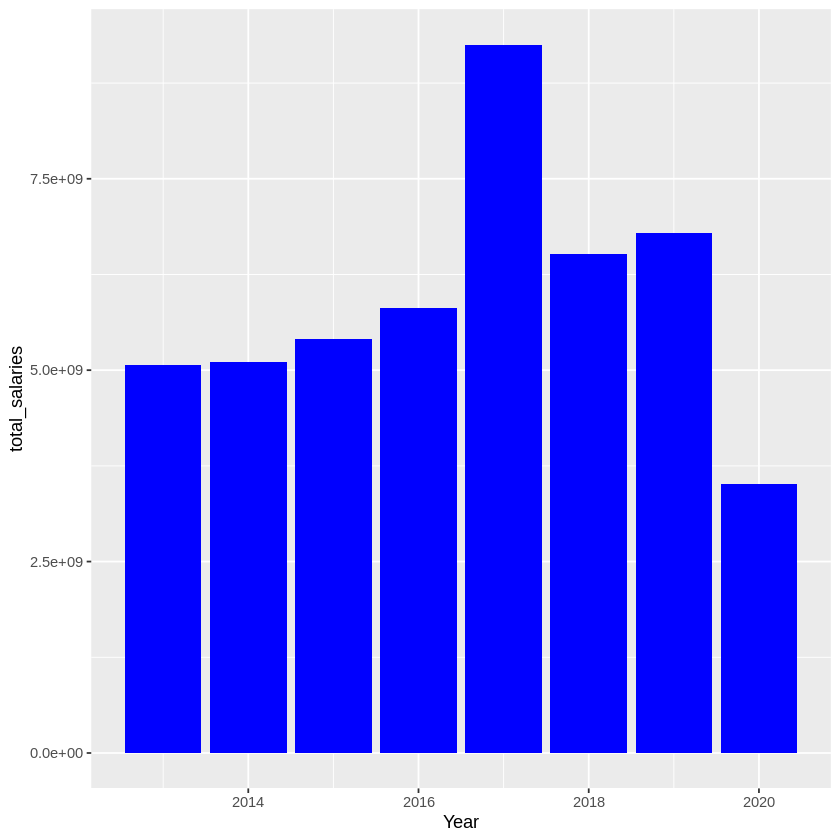

In [ ]:
 # library
library(ggplot2)


ggplot(grp_year, aes(y = total_salaries, x=Year)) + 
    geom_bar(fill="blue", position="dodge", stat="identity")

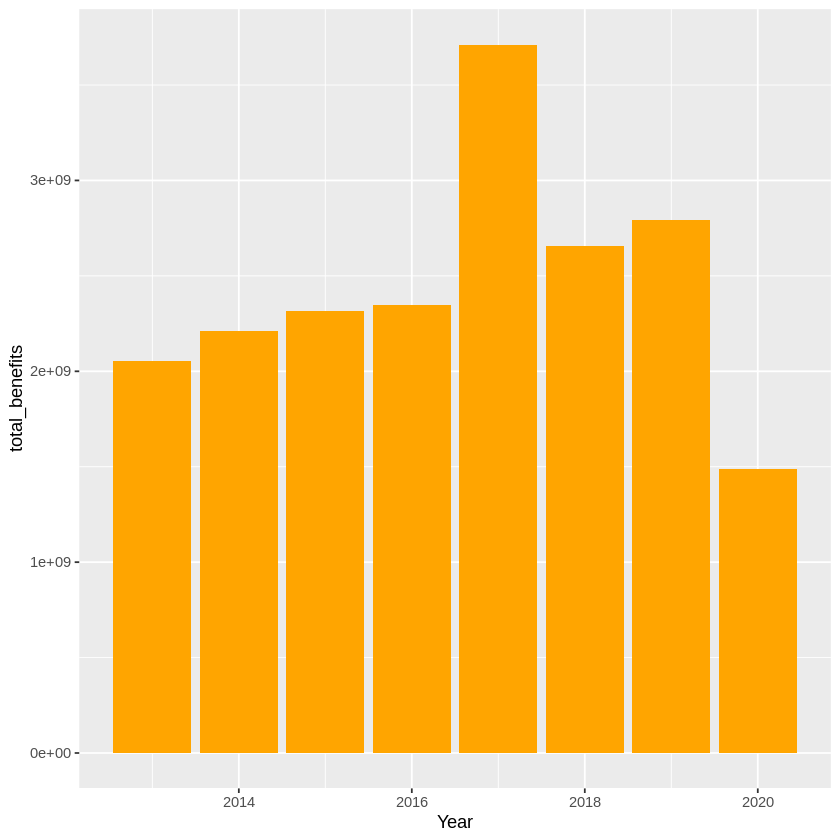

In [ ]:
ggplot(grp_year, aes(y = total_benefits, x=Year)) + 
    geom_bar(fill="orange", position="dodge", stat="identity")

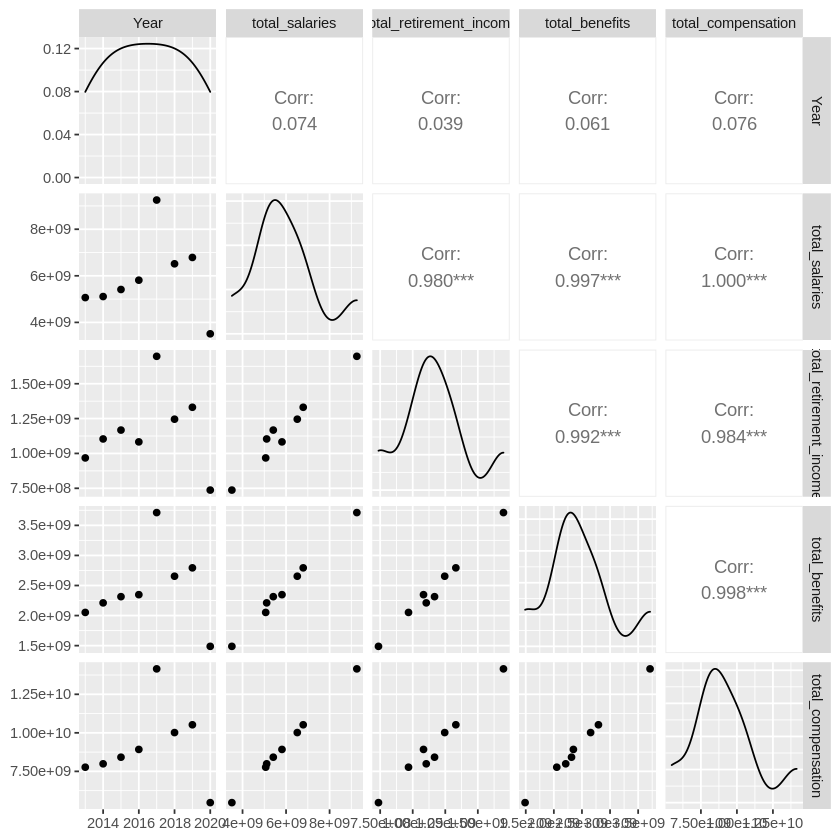

In [ ]:
ggpairs(grp_year)

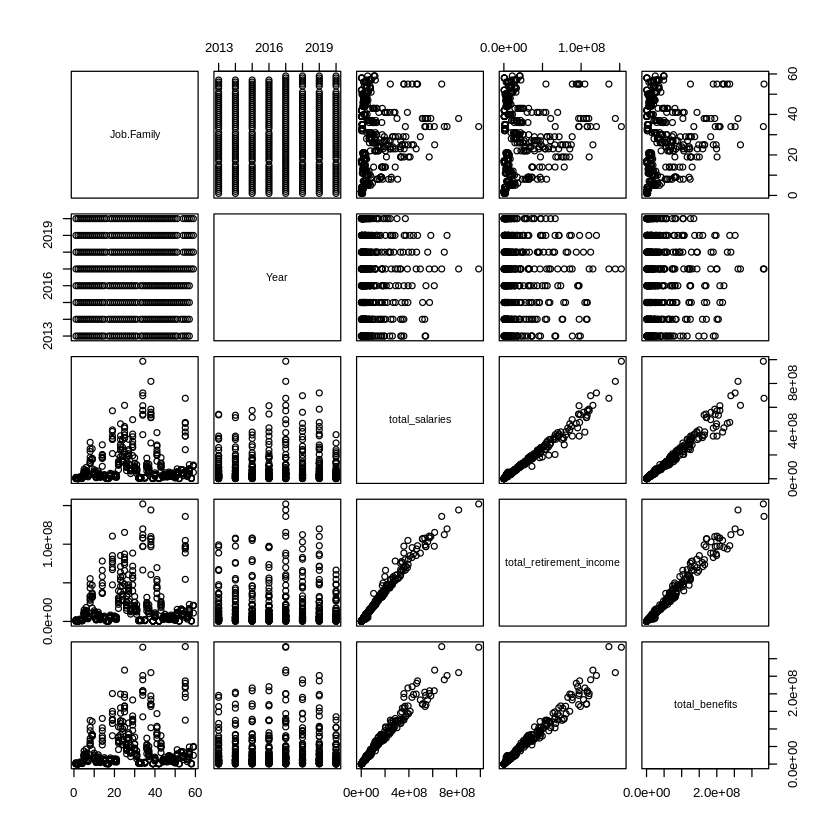

In [ ]:
plot(grp_job.family)

- As it can be noticed from the above charts that the highest total salary, benefits, compenseation were all in the year 2017.
The graph follows an upwards trend while boosting on year 2017 but there is a drastic decline in the year 2020.
- After intense summarising the data it can be noted that in 2019 Police department recieved the highest salary amongest all of 651936.7 and Total Compensation of 807625.2 
- From grp_job data frame it can be noted that there are more people as Transit operator than any other profession.
- From grp_job.famlity data frame it can be seen that nursing profession holds the highest total salaries received as well as the benefits for the year 2017. While people working in Administrative Secretarial department received the lowest salary and the benefits.
- As it can be seen that there is a postive correlation among all the columns in the grp_year data frame, which indicates that as a person's salary increases his benefits and total compensation also increases. 
- 

##Recommendation

- There is a drastic decline in salaries and benefits provided to the people of San Francisco in the year 2020, this means that when covid-19 struck San Francisco there were plenty of jobs that were lost as a result total salary, benefits and compensation were all reduced from all the previuos years.
- Overall income of people in service sector is higher meaning they are able to afford all the expenses of the city. 
- Overall the cost of living in the city is high but with people in transit operator or in nurse have more benefits and compensation so its affordable.